In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("owid-covid-data.csv")

In [3]:
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [5]:
print(df.isnull().sum().sort_values(ascending=False))

weekly_icu_admissions_per_million          293411
weekly_icu_admissions                      293411
excess_mortality_cumulative_per_million    292217
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative                292217
                                            ...  
new_deaths_per_million                       8373
date                                            0
location                                        0
population                                      0
iso_code                                        0
Length: 67, dtype: int64


In [6]:
columns_of_interest = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population']
df = df[columns_of_interest]

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
countries = ['South Africa', 'India', 'United States', 'Kenya', 'Brazil']
df = df[df['location'].isin(countries)]

In [9]:
df.fillna(method='ffill', inplace=True)
df.fillna(0, inplace=True)

/tmp/ipykernel_134/699617349.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
print(df.head())

      location       date  total_cases  new_cases  total_deaths  new_deaths  \
35882   Brazil 2020-01-03          0.0        0.0           0.0         0.0   
35883   Brazil 2020-01-04          0.0        0.0           0.0         0.0   
35884   Brazil 2020-01-05          0.0        0.0           0.0         0.0   
35885   Brazil 2020-01-06          0.0        0.0           0.0         0.0   
35886   Brazil 2020-01-07          0.0        0.0           0.0         0.0   

       total_vaccinations  people_vaccinated  people_fully_vaccinated  \
35882                 0.0                0.0                      0.0   
35883                 0.0                0.0                      0.0   
35884                 0.0                0.0                      0.0   
35885                 0.0                0.0                      0.0   
35886                 0.0                0.0                      0.0   

        population  
35882  215313504.0  
35883  215313504.0  
35884  215313504.0  
35

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set_theme(style='whitegrid')

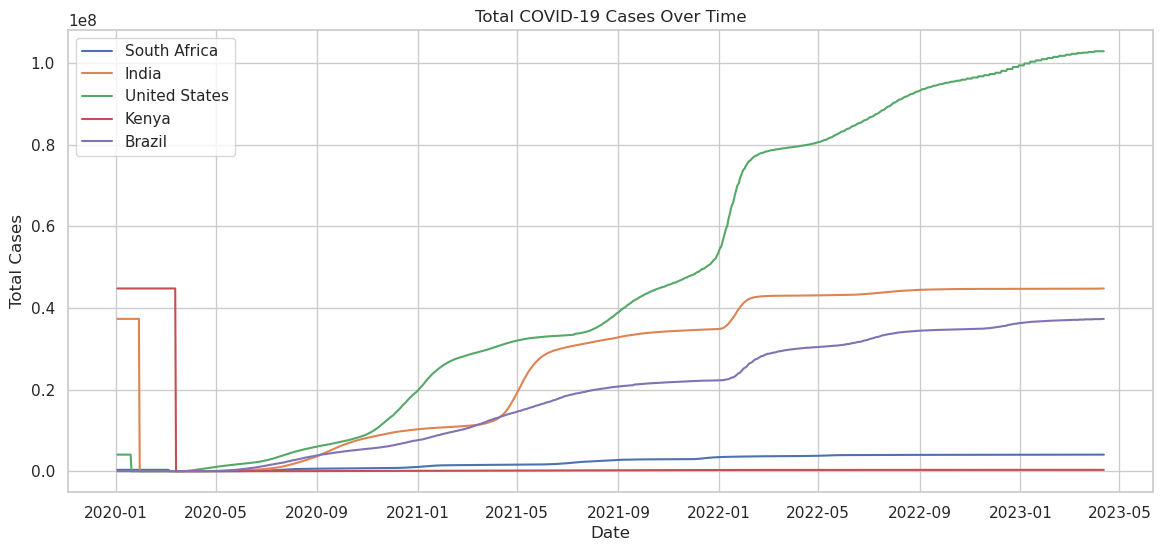

In [13]:
plt.figure(figsize=(14,6))
for country in countries:
    country_data = df[df['location']==country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
    plt.title("Total COVID-19 Cases Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Cases")
    plt.legend()
    plt.show

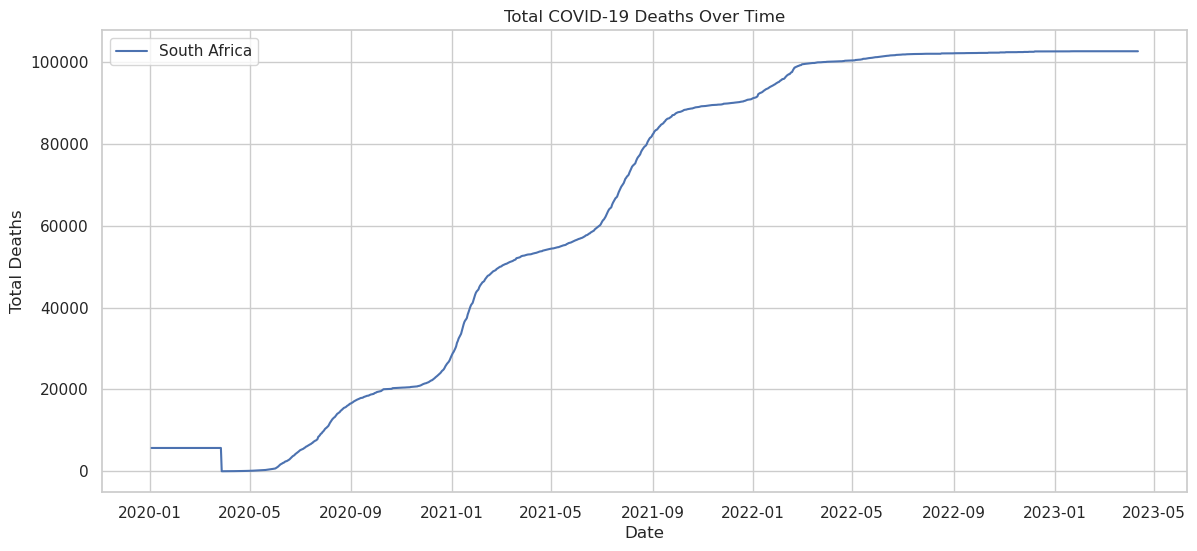

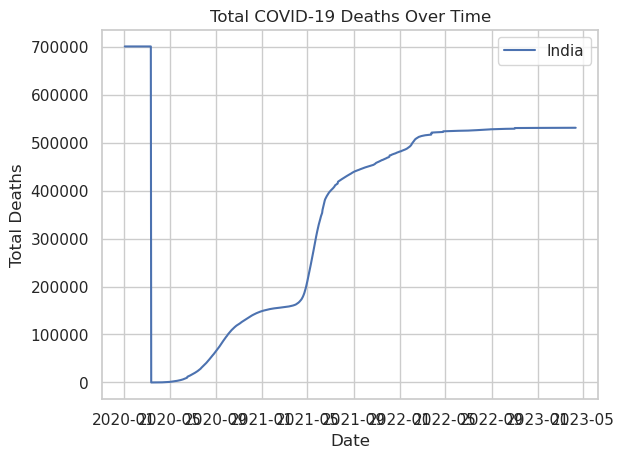

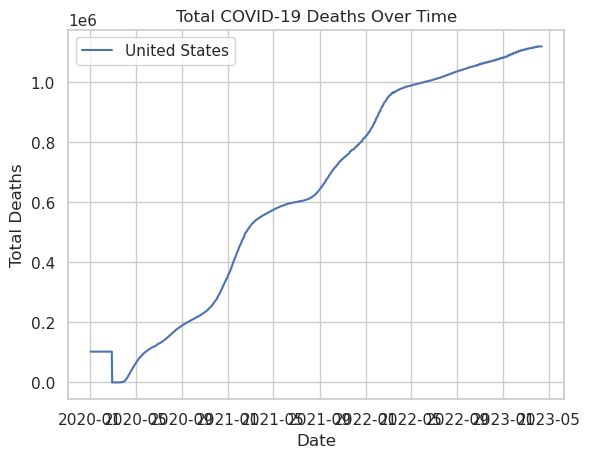

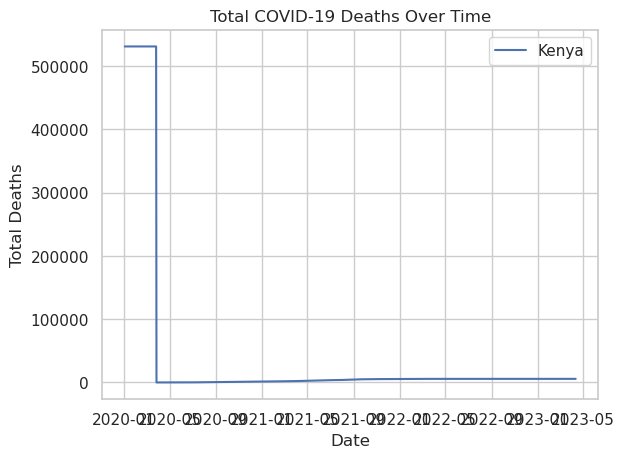

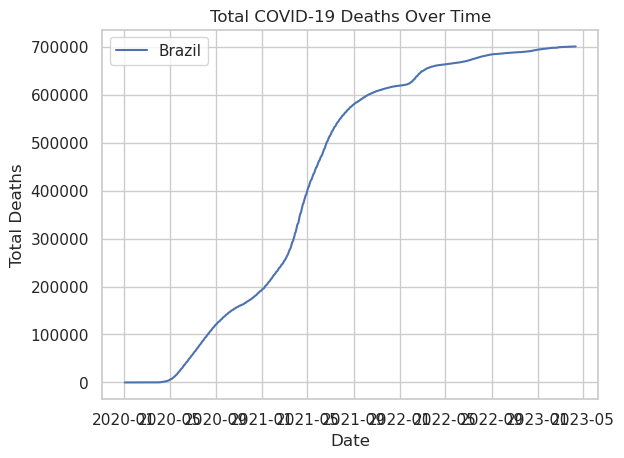

In [14]:
plt.figure(figsize=(14,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
    plt.title("Total COVID-19 Deaths Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Deaths")
    plt.legend()
    plt.show()

In [15]:
df['death_rate'] = df['total_deaths']/df['total_cases']

In [16]:
avg_death_rates = df.groupby('location')['death_rate'].mean().sort_values(ascending=False)

In [17]:
print(avg_death_rates)

location
India            3884.812970
Kenya            1641.529406
United States     625.724264
South Africa       16.237933
Brazil              0.026934
Name: death_rate, dtype: float64


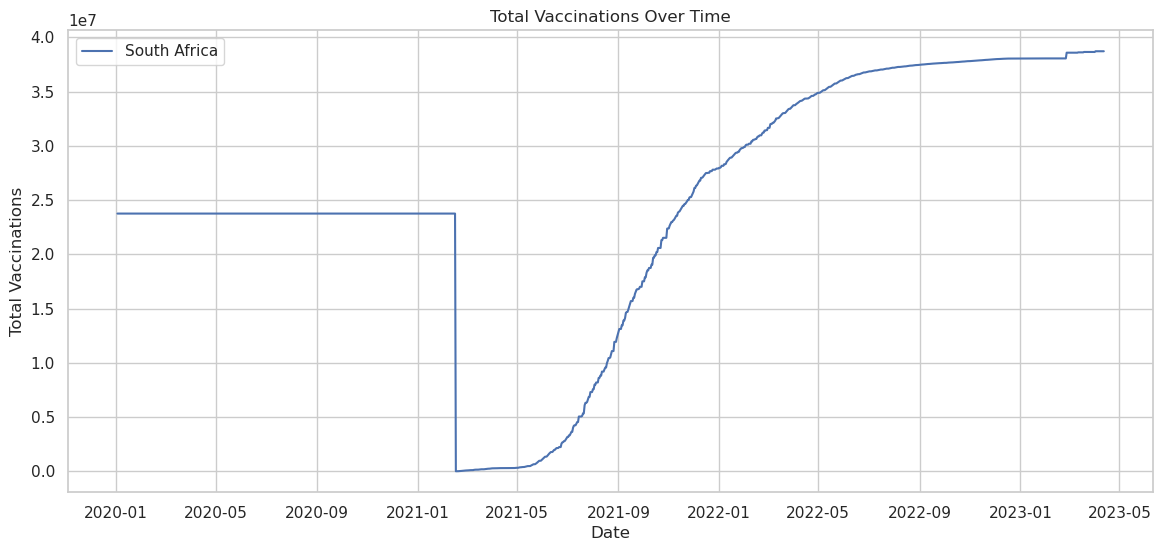

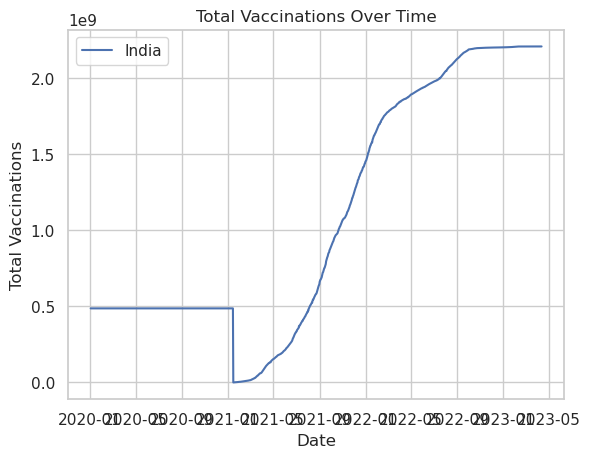

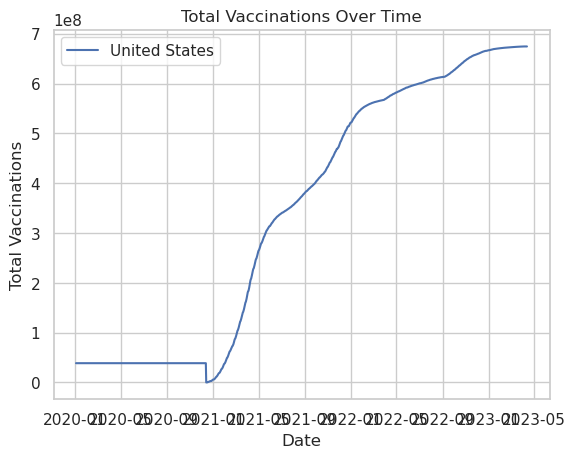

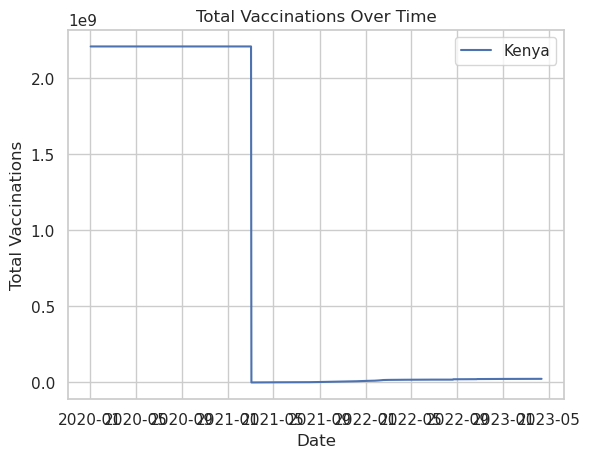

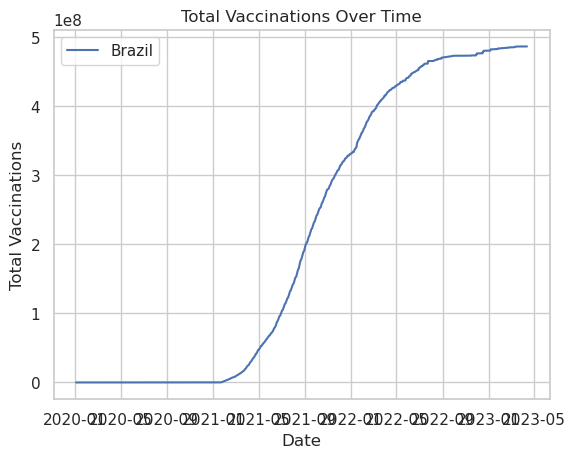

In [18]:
plt.figure(figsize=(14, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
    plt.title("Total Vaccinations Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Vaccinations")
    plt.legend()
    plt.show()

In [19]:
df['percent_vaccinated'] = df['people_fully_vaccinated']/df['population'] *100
latest_data = df.sort_values('date').groupby('location').tail(1)
latest_vax = latest_data[['location', 'percent_vaccinated']]

In [22]:
latest_vax = latest_data[['location', 'percent_vaccinated']].sort_values(by='percent_vaccinated')

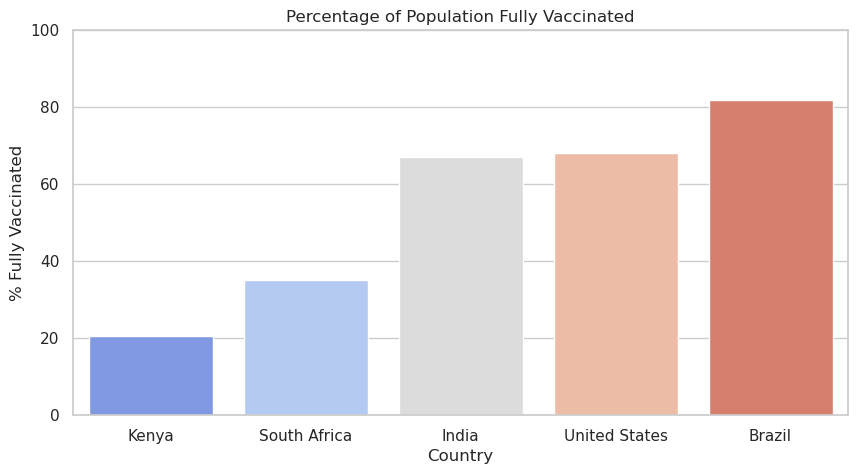

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(data=latest_vax, x='location', y='percent_vaccinated', palette='coolwarm')
plt.title("Percentage of Population Fully Vaccinated")
plt.ylabel("% Fully Vaccinated")
plt.xlabel("Country")
plt.ylim(0, 100)
plt.show()


In [24]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.
